In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data Loading

In [2]:
def CustomParser(data):
    import json
    j1 = json.loads(data)
    return j1

In [3]:
#Las películas
movies = pd.read_csv('movies.csv',
                     converters={'spoken_languages':lambda x: json.loads(x),
                                 'production_companies':lambda x: json.loads(x),
                                 'production_countries':lambda x: json.loads(x)}
                    )

In [7]:
movies[~movies.homepage.isna()][['imdb_id', 'title', 'release_date', 'runtime', 'homepage']].head(10).to_csv('./aux.csv',index = False, header=True)

,imdb_id,title,release_date,runtime,homepage
0,tt4590256,He's All That,2021-08-27,91,https://www.netflix.com/title/81446038
3,tt11657662,The Witcher: Nightmare of the Wolf,2021-08-23,81,https://www.netflix.com/title/81037868
5,tt15198608,Prey,2021-09-10,86,https://www.netflix.com/title/81350329
6,tt9731534,The Night House,2021-07-15,107,https://www.searchlightpictures.com/thenightho...
8,tt15095938,Blood Brothers: Malcolm X & Muhammad Ali,2021-09-09,95,https://www.netflix.com/title/81031582
10,tt10731768,Sweet Girl,2021-08-18,110,http://www.netflix.com/title/81058613
11,NaN,Amina,2021-11-04,120,https://www.netflix.com/title/81450071
12,tt3626476,Vacation Friends,2021-08-27,103,https://www.hulu.com/movie/c5fec97e-4c47-4b46-...
13,tt0133093,The Matrix,1999-03-30,136,http://www.warnerbros.com/matrix
14,tt11121664,Blue Bayou,2021-09-10,119,https://www.focusfeatures.com/blue-bayou


In [5]:
#Los géneros disponibles
genres = pd.read_csv('genres.csv')

In [6]:
#La relación película-género
mgenre = pd.read_csv('movie_genre.csv')

In [7]:
#Las tendencias
mtrends = pd.read_csv('movies_trends.csv')

# Analysis

In [8]:
def get_json_df(df,c):
    aux=[]
    for i in range(len(movies.index)):
        aux.extend(movies.iloc[i][c])
    return pd.DataFrame(aux)

## Companies

In [9]:
companies=get_json_df(movies,'production_companies')
companies['logo_path']="https://api.themoviedb.org/3/movie/"+companies['logo_path']
companies

,name,origin_country,id,logo_path
0,Miramax,US,14,https://api.themoviedb.org/3/movie//m6AHu84oZQ...
1,Ethea Entertainment,,158529,NaN
2,MSR Media,,141919,NaN
3,Soapbox Films,US,76708,https://api.themoviedb.org/3/movie//4P17y91erE...
4,Studio Mir,KR,58209,NaN
...,...,...,...,...
468,Film4 Productions,GB,6705,https://api.themoviedb.org/3/movie//e8EXNSfwr5...
469,Working Title Films,GB,10163,https://api.themoviedb.org/3/movie//16KWBMmfPX...
470,Big Talk Productions,GB,443,https://api.themoviedb.org/3/movie//deewJi8ncC...
471,Complete Fiction,GB,131464,NaN


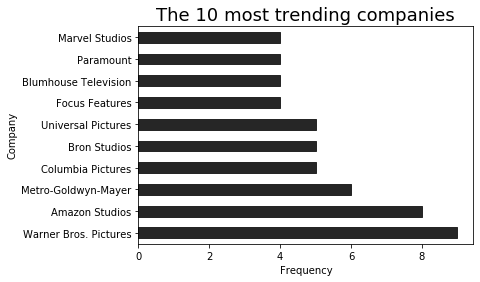

In [10]:
companies.name.value_counts()[:10].plot.barh(Color='0.15')
plt.title("The 10 most trending companies",size=18)
plt.ylabel("Company")
plt.xlabel("Frequency")
plt.savefig('./Summary/companies.png',bbox_inches='tight')
plt.show()

## Countries

In [11]:
countries=get_json_df(movies,'production_countries')
countries

,name,iso_3166_1
0,United States of America,US
1,United States of America,US
2,United States of America,US
3,South Korea,KR
4,United States of America,US
...,...,...
194,Canada,CA
195,United States of America,US
196,United States of America,US
197,Italy,IT


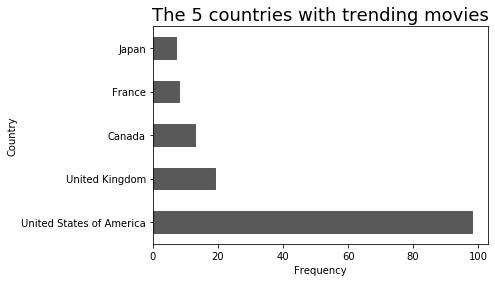

In [12]:
countries.name.value_counts()[:5].plot.barh(Color='0.35')
plt.title("The 5 countries with trending movies",size=18)
plt.ylabel("Country")
plt.xlabel("Frequency")
plt.savefig('./Summary/countries.png',bbox_inches='tight')
plt.show()

## Languages

In [13]:
languages=get_json_df(movies,'spoken_languages')
languages

,name,iso_639_1,english_name
0,English,en,English
1,English,en,English
2,English,en,English
3,Español,es,Spanish
4,English,en,English
...,...,...,...
179,English,en,English
180,English,en,English
181,Italiano,it,Italian
182,English,en,English


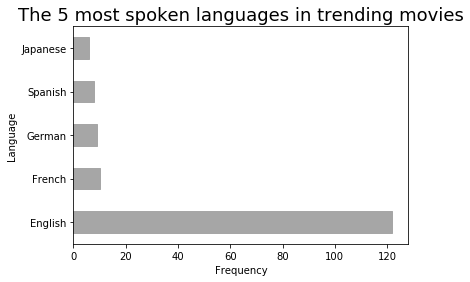

In [14]:
languages.english_name.value_counts()[:5].plot.barh(Color='0.65')
plt.title("The 5 most spoken languages in trending movies",size=18)
plt.ylabel("Language")
plt.xlabel("Frequency")
plt.savefig('./Summary/languages.png',bbox_inches='tight')
plt.show()

## Movies themselves

To avoid impurities in the results we will only consider movies that were released

In [15]:
movies=movies[movies['status']=='Released']

In [16]:
#Mean budget
movies.budget.mean()

19903214.965034965

In [17]:
#Mean runtime (in minutes)
movies.runtime.mean()

100.27272727272727

In [18]:
# Correlations
movies.drop('id',axis=1).corr()

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.460933,0.790165,0.395609,0.249049,0.473482
popularity,0.460933,1.000000,0.401403,0.186437,0.225446,0.180977
revenue,0.790165,0.401403,1.000000,0.307995,0.200166,0.692015
runtime,0.395609,0.186437,0.307995,1.000000,0.157772,0.226996
vote_average,0.249049,0.225446,0.200166,0.157772,1.000000,0.205910
vote_count,0.473482,0.180977,0.692015,0.226996,0.205910,1.000000


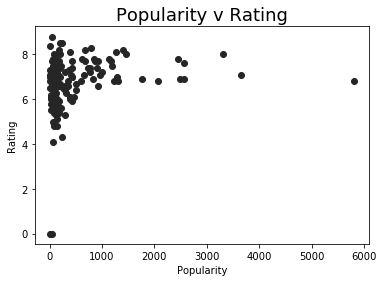

In [19]:
plt.scatter(movies.popularity,movies.vote_average,color='0.15')
plt.title("Popularity v Rating",size=18)
plt.ylabel("Rating")
plt.xlabel("Popularity")
plt.savefig('./Summary/popularityvvoteavg.png')
plt.show()

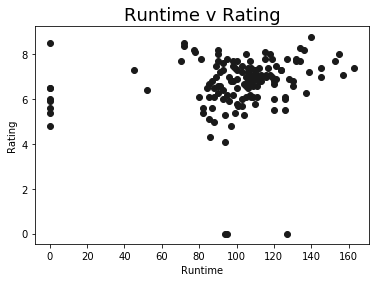

In [20]:
plt.scatter(movies.runtime,movies.vote_average,color='0.1')
plt.title("Runtime v Rating",size=18)
plt.ylabel("Rating")
plt.xlabel("Runtime")
plt.savefig('./Summary/runtimevvoteavg.png')
plt.show()

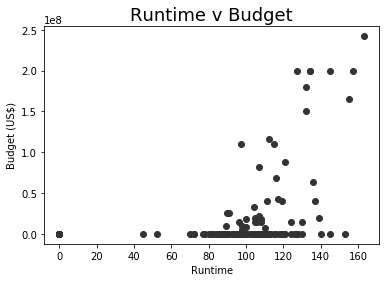

In [21]:
plt.scatter(movies.runtime,movies.budget,color='0.20')
plt.title("Runtime v Budget",size=18)
plt.ylabel("Budget (US$)")
plt.xlabel("Runtime")
plt.savefig('./Summary/runtimevbudget.png')
plt.show()

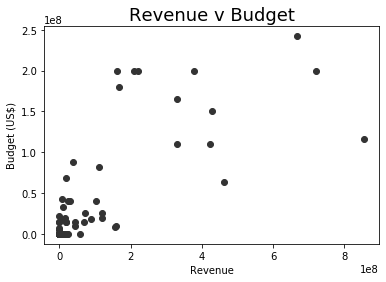

In [22]:
plt.scatter(movies.revenue,movies.budget,color='0.20')
plt.title("Revenue v Budget",size=18)
plt.ylabel("Budget (US$)")
plt.xlabel("Revenue")
plt.savefig('./Summary/revenuevbudget.png')
plt.show()

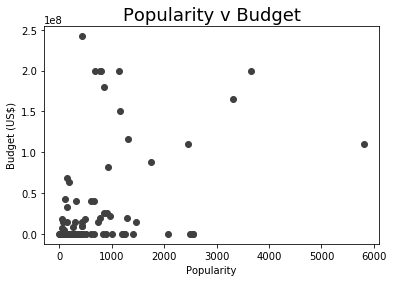

In [23]:
plt.scatter(movies.popularity,movies.budget,color='0.25')
plt.title("Popularity v Budget",size=18)
plt.ylabel("Budget (US$)")
plt.xlabel("Popularity")
plt.savefig('./Summary/popularityvbudget.png')
plt.show()

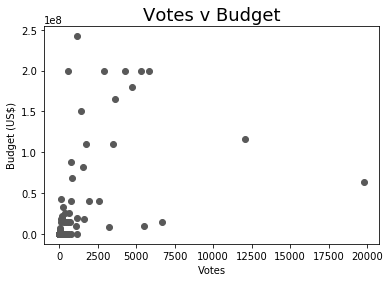

In [24]:
plt.scatter(movies.vote_count,movies.budget,color='0.35')
plt.title("Votes v Budget",size=18)
plt.ylabel("Budget (US$)")
plt.xlabel("Votes")
plt.savefig('./Summary/votesvbudget.png')
plt.show()

In [25]:
#Average Rating
movies.vote_average.mean()

6.6692307692307695

In [26]:
#Average quantity of votes
movies.vote_count.mean()

758.993006993007

In [27]:
#PAverage popularity
movies.popularity.mean()

478.40370629370636

In [28]:
#How many movies belong to a collection?
len(movies[movies['belongs_to_collection'].notnull()])

34

In [29]:
#How many movies own a website?
len(movies[movies['homepage'].notnull()])

91

## Genres

In [31]:
#Los géneros más populares
mgname= mgenre.replace(list(genres['id']),list(genres['name']))
mgname

,id_movie,id_genre
0,653349,Comedy
1,666243,Animation
2,666243,Action
3,666243,Fantasy
4,347626,Comedy
...,...,...
68,581726,Thriller
69,451048,Adventure
70,451048,Fantasy
71,451048,Comedy


In [32]:
#Possible genres
mgname.id_genre.unique()

array(['Comedy', 'Animation', 'Action', 'Fantasy', 'Romance',
       'Science Fiction', 'Mystery', 'Thriller', 'Horror', 'Drama',
       'Adventure', 'Music', 'History', 'Crime', 'Family'], dtype=object)

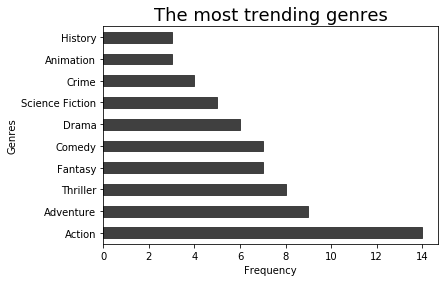

In [33]:
mgname.id_genre.value_counts()[:10].plot.barh(Color='0.25')
plt.title("The most trending genres",size=18)
plt.ylabel("Genres")
plt.xlabel("Frequency")
plt.savefig('./Summary/genres.png',bbox_inches='tight')
plt.show()

## Successful trending movies

In [61]:
#We change the movie id to the name, so we can count easily
mttitle=mtrends.replace(list(movies.id),list(movies.title))
mttitle

,id,popularity,revenue,status,vote_average,vote_count,trend_day
0,Vacation Friends,48.521,0,Released,6.3,6,2021-08-27
1,The Witcher: Nightmare of the Wolf,247.572,0,Released,7.7,130,2021-08-27
2,He's All That,92.207,0,Released,6.8,16,2021-08-27
3,Reminiscence,1011.510,5000000,Released,7.4,305,2021-08-27
4,The Protégé,68.297,2935000,Released,6.8,19,2021-08-27
...,...,...,...,...,...,...,...
1491,The Suicide Squad,845.785,167381210,Released,7.8,4687,2021-11-09
1492,Shang-Chi and the Legend of the Ten Rings,1167.738,427480601,Released,7.7,1412,2021-11-09
1493,Black Widow,683.258,378328978,Released,7.7,5816,2021-11-09
1494,Halloween Kills,1288.832,118852075,Released,7.0,1127,2021-11-09


In [35]:
topmovies=mttitle.sort_values(by=['vote_average'],ascending=False).id.unique()[:10]
avg=movies[(movies.title.isin(topmovies))][['title','vote_average']]
avg.sort_values('vote_average',ascending=False,inplace=True)

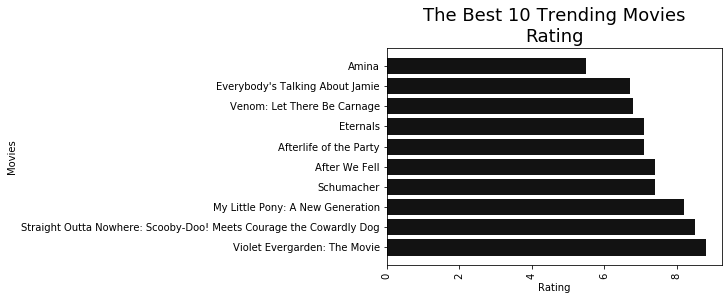

In [36]:
plt.barh(avg['title'],avg['vote_average'],color='0.07')
plt.title("The Best 10 Trending Movies\nRating",size=18)
plt.xticks(rotation=90)
plt.ylabel("Movies")
plt.xlabel("Rating")
plt.savefig('./Summary/mtrendsvoteavg.png',bbox_inches='tight')
plt.show()

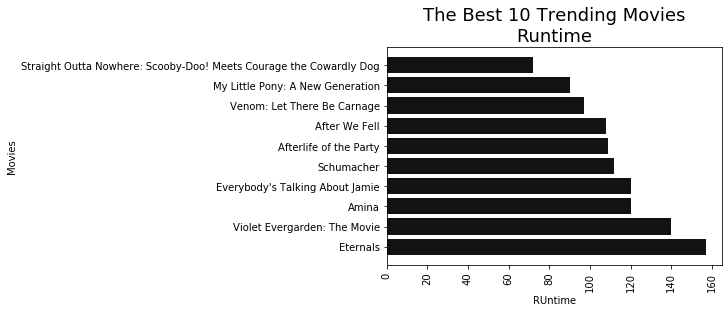

In [37]:
run=movies[(movies.title.isin(topmovies))][['title','runtime']]
run.sort_values('runtime',ascending=False,inplace=True)
plt.barh(run['title'],run['runtime'],color='0.07')
plt.title("The Best 10 Trending Movies\nRuntime",size=18)
plt.xticks(rotation=90)
plt.ylabel("Movies")
plt.xlabel("RUntime")
plt.savefig('./Summary/mtrendsruntime.png',bbox_inches='tight')
plt.show()

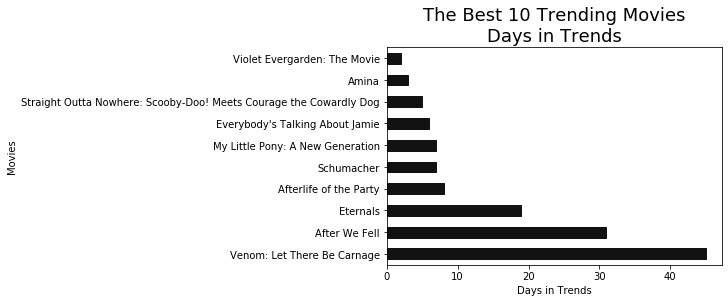

In [38]:
mttitle[mttitle['id'].isin(topmovies)].id.value_counts().plot.barh(Color='0.07')
plt.title("The Best 10 Trending Movies\nDays in Trends",size=18)
plt.ylabel("Movies")
plt.xlabel("Days in Trends")
plt.savefig('./Summary/mtrends.png',bbox_inches='tight')
plt.show()

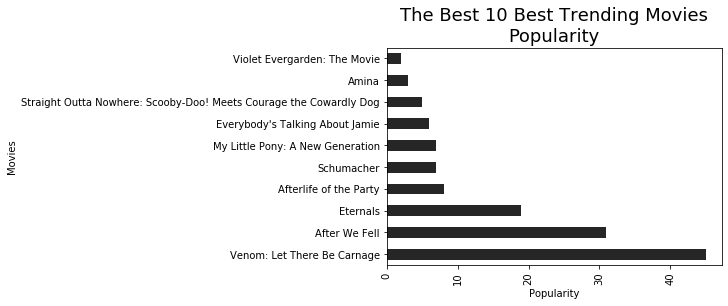

In [39]:
mttitle[(mttitle.id.isin(topmovies))].id.value_counts().plot.barh(topmovies,color='0.15')
plt.title("The Best 10 Best Trending Movies\nPopularity",size=18)
plt.xticks(rotation=90)
plt.ylabel("Movies")
plt.xlabel("Popularity")
plt.savefig('./Summary/mtrendspopularity.png',bbox_inches='tight')
plt.show()

## The interaction of the trending movies in the platform TMDB

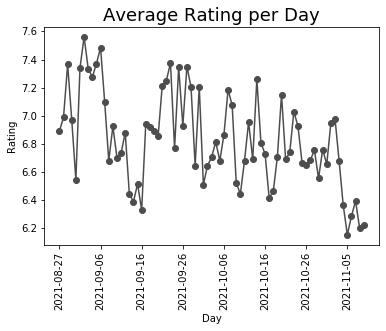

In [40]:
mttitle.groupby('trend_day')['vote_average'].mean().plot(color='0.30',kind='line',marker='o')
plt.title("Average Rating per Day",size=18)
plt.xticks(rotation=90)
plt.xlabel("Day")
plt.ylabel("Rating")
plt.savefig('./Summary/daysavg.png',bbox_inches='tight')
plt.show()

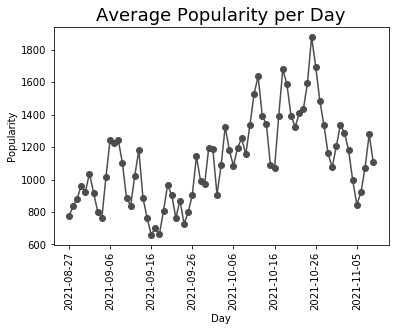

In [41]:
mttitle.groupby('trend_day')['popularity'].mean().plot(color='0.30',kind='line',marker='o')
plt.title("Average Popularity per Day",size=18)
plt.xticks(rotation=90)
plt.xlabel("Day")
plt.ylabel("Popularity")
plt.savefig('./Summary/dayspopularity.png',bbox_inches='tight')
plt.show()

In [81]:
mttitle[mttitle.vote_count=='Dune']

,id,popularity,revenue,status,vote_average,vote_count,trend_day


In [78]:
mttitle.loc[1094,'vote_count']=0

In [93]:
mttitle.vote_count = pd.to_numeric(mttitle.vote_count)

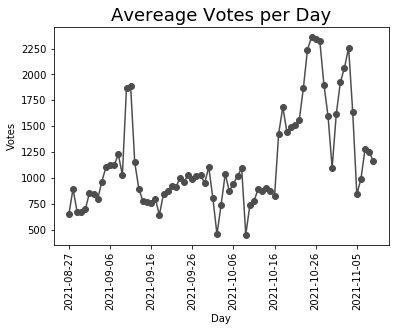

In [94]:
mttitle.groupby('trend_day')['vote_count'].mean().plot(color='0.30',kind='line',marker='o')
plt.title("Avereage Votes per Day",size=18)
plt.xticks(rotation=90)
plt.xlabel("Day")
plt.ylabel("Votes")
plt.savefig('./Summary/daysvotes.png',bbox_inches='tight')
plt.show()